<!--NOTEBOOK_INFORMATION-->
<img id="r-1060983" data-claire-element-id="1061343" src="http://www.siteduzero.com/favicon.ico" alt="Image utilisateur">
    <p>
        **<font color='#D2691E'size="6">Projet n°7 : Indexations automatiques d'images (2/9)</font>**.
    </p>
    <p>
        Ce notebook contient les étapes de préprocessing et de définition des périmètres de train, validation et test des données du projet n°7.
    </p>

<p>
    <center>
        **<font color='	#D2691E'size="6">ROADMAP</font>**
    </center>
</p>
<img align="left" style="padding-right:10px;" src="./images/part_2.jpg">

<p>
    <center>
        **<font color='	#D2691E'size="6">PLAN</font>**
    </center>
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries and functions import</font>**
</p>
<p>
        **<font color='#D2691E'size="4">I) Defining the train and test perimeters on a data sample</font>**
</p>
<p>
        **<font color='#D2691E'size="4">II) Mapping pictures to train, validation and test perimeters</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III) Exploring the picture management and the SIFT algorithm</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III.1) Displaying a picture with cv2</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III.2) Generating SIFT features</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III.3) Extracting SIFT features RGB values</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III.4) Building a relational data structure from SIFT features</font>**
</p>
<p>
        **<font color='#D2691E'size="4">IV) Building the SIFT features for the train and test perimeters</font>**
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries and functions import</font>**
</p>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import cv2
import os
from os import listdir
import time
import pickle
from PIL import Image
from PIL.ImageOps import equalize

In [3]:
from context import datasources_path, pickles_path

In [4]:
from functions import values_to_col

In [5]:
races_path = datasources_path+"Images\\"
races_path

'D:\\Users\\konat\\Documents\\Etudes\\Parcours Data Scientist\\Projet_7_Indexation_images\\Data\\datasources\\Images\\'

In [6]:
from functions import class_my_files

In [7]:
#We can access to all the folders of pictures (each folder matches to a race) : 
L_directories = listdir(races_path)
L_directories[0:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

In [8]:
class_my_files(races_path+'affenpinscher')

{'csv': [],
 'jpg': ['affenpinscher_10147.jpg',
  'affenpinscher_10185.jpg',
  'affenpinscher_10225.jpg',
  'affenpinscher_10437.jpg',
  'affenpinscher_10439.jpg',
  'affenpinscher_10447.jpg',
  'affenpinscher_10680.jpg',
  'affenpinscher_10787.jpg',
  'affenpinscher_10848.jpg',
  'affenpinscher_10859.jpg',
  'affenpinscher_10986.jpg',
  'affenpinscher_11211.jpg',
  'affenpinscher_11262.jpg',
  'affenpinscher_11263.jpg',
  'affenpinscher_11279.jpg',
  'affenpinscher_11283.jpg',
  'affenpinscher_11345.jpg',
  'affenpinscher_11365.jpg',
  'affenpinscher_11422.jpg',
  'affenpinscher_11435.jpg',
  'affenpinscher_11584.jpg',
  'affenpinscher_11614.jpg',
  'affenpinscher_11620.jpg',
  'affenpinscher_11657.jpg',
  'affenpinscher_11663.jpg',
  'affenpinscher_11759.jpg',
  'affenpinscher_11782.jpg',
  'affenpinscher_11783.jpg',
  'affenpinscher_11798.jpg',
  'affenpinscher_11811.jpg',
  'affenpinscher_11819.jpg',
  'affenpinscher_11835.jpg',
  'affenpinscher_11853.jpg',
  'affenpinscher_11858.j

In [7]:
#We can now build a dictionary which maps races to their corpus of pictures :
dict_race_pictures = {}
for directory in L_directories:
    dict_extensions_files = class_my_files(races_path+directory)
    dict_race_pictures[directory] = dict_extensions_files['jpg']

In [8]:
L_races = []
for race in dict_race_pictures.keys():
    L_races.append(race)
L_races[0:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

In [9]:
pickle.dump(L_races,open(pickles_path+"L_races.p", "wb"))

<p>
        **<font color='#D2691E'size="4">I) Defining the train and test perimeters on a data sample</font>**
</p>

In [10]:
#We initialize two dictionaries; each will map races to their train or test datas
dict_race_pictures_train = {}
dict_race_pictures_test = {}

In [11]:
#Let's try an example of train/test splitting with the first race :
race = L_races[0]
dict_race_pictures_train[race] = []
dict_race_pictures_test[race] = []
dict_race_pictures[race]

['affenpinscher_10147.jpg',
 'affenpinscher_10185.jpg',
 'affenpinscher_10225.jpg',
 'affenpinscher_10437.jpg',
 'affenpinscher_10439.jpg',
 'affenpinscher_10447.jpg',
 'affenpinscher_10680.jpg',
 'affenpinscher_10787.jpg',
 'affenpinscher_10848.jpg',
 'affenpinscher_10859.jpg',
 'affenpinscher_10986.jpg',
 'affenpinscher_11211.jpg',
 'affenpinscher_11262.jpg',
 'affenpinscher_11263.jpg',
 'affenpinscher_11279.jpg',
 'affenpinscher_11283.jpg',
 'affenpinscher_11345.jpg',
 'affenpinscher_11365.jpg',
 'affenpinscher_11422.jpg',
 'affenpinscher_11435.jpg',
 'affenpinscher_11584.jpg',
 'affenpinscher_11614.jpg',
 'affenpinscher_11620.jpg',
 'affenpinscher_11657.jpg',
 'affenpinscher_11663.jpg',
 'affenpinscher_11759.jpg',
 'affenpinscher_11782.jpg',
 'affenpinscher_11783.jpg',
 'affenpinscher_11798.jpg',
 'affenpinscher_11811.jpg',
 'affenpinscher_11819.jpg',
 'affenpinscher_11835.jpg',
 'affenpinscher_11853.jpg',
 'affenpinscher_11858.jpg',
 'affenpinscher_11875.jpg',
 'affenpinscher_1194

In [12]:
import random

In [13]:
#We build a list which contains all the available indexes in the current race's folder :
n_pictures_in_race = len(dict_race_pictures[race])
L_indexes = list(range(0,n_pictures_in_race))
L_indexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [14]:
#Thanks to the number of pictures included in the race, we can compute the train threshold of 75% of the data :
tmp_train_thresold = int(n_pictures_in_race*0.75)
tmp_train_thresold

112

In [15]:
#And we can now randomly choose 75% of the available indexes for the race's train perimeter : 
L_tmp_train_indexes = random.sample(L_indexes, tmp_train_thresold)
print("tmp_train_idexes lenght is : %s"%len(L_tmp_train_indexes))
L_tmp_train_indexes = np.sort(L_tmp_train_indexes)
L_tmp_train_indexes

tmp_train_idexes lenght is : 112


array([  0,   1,   2,   3,   4,   7,   8,   9,  11,  13,  14,  16,  17,
        19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  30,  32,  33,
        34,  35,  37,  38,  39,  40,  42,  43,  44,  46,  47,  49,  51,
        53,  54,  55,  57,  59,  60,  62,  63,  64,  65,  66,  69,  70,
        72,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  91,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 104, 106, 109, 110, 112, 113, 114, 116, 117, 121, 122, 123,
       124, 125, 126, 127, 128, 130, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 144, 145, 146, 147, 149])

In [16]:
#The test perimeter contains all the available indexes that don't exists in the train indexes perimeter :
L_tmp_test_indexes = [index for index in L_indexes if not index in L_tmp_train_indexes]
L_tmp_test_indexes = np.sort(L_tmp_test_indexes)
L_tmp_test_indexes

array([  5,   6,  10,  12,  15,  18,  24,  31,  36,  41,  45,  48,  50,
        52,  56,  58,  61,  67,  68,  71,  73,  74,  90,  92, 103, 105,
       107, 108, 111, 115, 118, 119, 120, 129, 131, 142, 143, 148])

In [17]:
#With this indexes we can build a train and a test dataframe, based on the pictures related to the race 
#For example for some train indexes: 
some_train_indexes = list(L_tmp_train_indexes[0:10])
#We can access to the corresponding pictures
[dict_race_pictures[race][i] for i in some_train_indexes]

['affenpinscher_10147.jpg',
 'affenpinscher_10185.jpg',
 'affenpinscher_10225.jpg',
 'affenpinscher_10437.jpg',
 'affenpinscher_10439.jpg',
 'affenpinscher_10787.jpg',
 'affenpinscher_10848.jpg',
 'affenpinscher_10859.jpg',
 'affenpinscher_11211.jpg',
 'affenpinscher_11263.jpg']

<p>
        **<font color='#D2691E'size="4">II) Mapping pictures to train, validation and test perimeters</font>**
</p>

In [18]:
#We can generalize this process to all the pictures linked to all the races :
dict_data = {
    'train_data_without_validation':{},
    'train_data_with_validation':{},
    'validation_data':{},
    'test_data':{}
            }

for race in L_races :
    #train and test dictionaries building :
    dict_race_pictures_train[race] = []
    dict_race_pictures_test[race] = []
    dict_data['train_data_without_validation'][race] = []
    dict_data['train_data_with_validation'][race] = []
    dict_data['validation_data'][race] = []
    dict_data['test_data'][race] = []
    
    #Indexes management :
    n_pictures_in_race = len(dict_race_pictures[race])
    L_indexes = list(range(0,n_pictures_in_race))
    
    train_thresold = int(n_pictures_in_race*0.75)
    
    ##Creating the train indexes : 
    L_train_indexes = random.sample(L_indexes, train_thresold)
    L_train_indexes = np.sort(L_train_indexes)
    
    
    ##Dealing with the validation indexes : 
    n_pictures_in_train = len(L_train_indexes)
    val_thresold = int(n_pictures_in_train*0.25)
    ##Creating the validation indexes : 
    L_val_indexes = random.sample(list(L_train_indexes), val_thresold)
    L_val_indexes = np.sort(L_val_indexes)
    L_train_with_validation_indexes = [index for index in L_train_indexes if not index in L_val_indexes]
    
    
    
    ##Creating the test indexes : 
    L_test_indexes = [index for index in L_indexes if not index in L_train_indexes]
    L_test_indexes = np.sort(L_test_indexes)
    
    #We loop over all the pictures linked to the current race :
    for index in L_indexes :
        #The picture corresponding to the current index
        picture = dict_race_pictures[race][index]
        
        #if the current index is in the test perimeter we append it to the test dictionary
        if index in L_test_indexes:
            dict_race_pictures_test[race].append(picture)
            dict_data['test_data'][race].append(picture)
        
        #In the other cases the picture is a part of the (full) train perimeter :
        if index in L_train_indexes:
            dict_race_pictures_train[race].append(picture)
            dict_data['train_data_without_validation'][race].append(picture)
        
        #if it's only in the train data with validation perimeter :
        if index in L_train_with_validation_indexes:
            dict_data['train_data_with_validation'][race].append(picture)
        
        #if it's in the validation perimeter, we append it to the validation dictionary  :
        if index in L_val_indexes:
            dict_data['validation_data'][race].append(picture)      

In [19]:
dict_race_pictures_train

{'affenpinscher': ['affenpinscher_10225.jpg',
  'affenpinscher_10447.jpg',
  'affenpinscher_10787.jpg',
  'affenpinscher_10859.jpg',
  'affenpinscher_11211.jpg',
  'affenpinscher_11262.jpg',
  'affenpinscher_11263.jpg',
  'affenpinscher_11279.jpg',
  'affenpinscher_11283.jpg',
  'affenpinscher_11345.jpg',
  'affenpinscher_11422.jpg',
  'affenpinscher_11435.jpg',
  'affenpinscher_11584.jpg',
  'affenpinscher_11614.jpg',
  'affenpinscher_11620.jpg',
  'affenpinscher_11657.jpg',
  'affenpinscher_11663.jpg',
  'affenpinscher_11759.jpg',
  'affenpinscher_11782.jpg',
  'affenpinscher_11798.jpg',
  'affenpinscher_11811.jpg',
  'affenpinscher_11819.jpg',
  'affenpinscher_11835.jpg',
  'affenpinscher_11853.jpg',
  'affenpinscher_11858.jpg',
  'affenpinscher_11942.jpg',
  'affenpinscher_12003.jpg',
  'affenpinscher_12025.jpg',
  'affenpinscher_12070.jpg',
  'affenpinscher_12077.jpg',
  'affenpinscher_12227.jpg',
  'affenpinscher_12272.jpg',
  'affenpinscher_12391.jpg',
  'affenpinscher_12431.jpg

In [20]:
dict_race_pictures_test

{'affenpinscher': ['affenpinscher_10147.jpg',
  'affenpinscher_10185.jpg',
  'affenpinscher_10437.jpg',
  'affenpinscher_10439.jpg',
  'affenpinscher_10680.jpg',
  'affenpinscher_10848.jpg',
  'affenpinscher_10986.jpg',
  'affenpinscher_11365.jpg',
  'affenpinscher_11783.jpg',
  'affenpinscher_11875.jpg',
  'affenpinscher_12808.jpg',
  'affenpinscher_12819.jpg',
  'affenpinscher_12893.jpg',
  'affenpinscher_12973.jpg',
  'affenpinscher_13020.jpg',
  'affenpinscher_13221.jpg',
  'affenpinscher_13420.jpg',
  'affenpinscher_1966.jpg',
  'affenpinscher_2997.jpg',
  'affenpinscher_3730.jpg',
  'affenpinscher_3972.jpg',
  'affenpinscher_4086.jpg',
  'affenpinscher_4130.jpg',
  'affenpinscher_4275.jpg',
  'affenpinscher_4542.jpg',
  'affenpinscher_475.jpg',
  'affenpinscher_4839.jpg',
  'affenpinscher_5186.jpg',
  'affenpinscher_5361.jpg',
  'affenpinscher_6069.jpg',
  'affenpinscher_6670.jpg',
  'affenpinscher_6796.jpg',
  'affenpinscher_6842.jpg',
  'affenpinscher_6965.jpg',
  'affenpinsche

In [21]:
pickle.dump(dict_race_pictures_train,open(pickles_path+"dict_race_pictures_train.p", "wb"))
pickle.dump(dict_race_pictures_test,open(pickles_path+"dict_race_pictures_test.p", "wb"))
pickle.dump(dict_data,open(pickles_path+"dict_data.p", "wb"))

<p>
        **<font color='#D2691E'size="4">III) Exploring the picture management and the SIFT algorithm</font>**
</p>

In [23]:
def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

In [24]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

In [25]:
def gen_sift_features(gray_img):
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

In [26]:
def show_sift_features(gray_img, color_img, kp):
    plt.figure(figsize=(10,10))
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

<p>
        **<font color='#D2691E'size="4">III.1) Displaying a picture with cv2</font>**
</p>

In [29]:
#Let's start the process with a first example : 

In [30]:
#We create an id
ID = 0

In [31]:
#The race corresponding to the id is :
race = L_races[ID]
race

'affenpinscher'

In [32]:
#The first picture corresponding to this race is : 
picture = dict_race_pictures_train[race][0]
picture

'affenpinscher_10225.jpg'

In [33]:
#The path to this picture is :
picture_path = races_path+race+"\\"+picture
picture_path

'D:\\Users\\konat\\Documents\\Etudes\\Parcours Data Scientist\\Projet_7_Indexation_images\\Data\\datasources\\Images\\affenpinscher\\affenpinscher_10225.jpg'

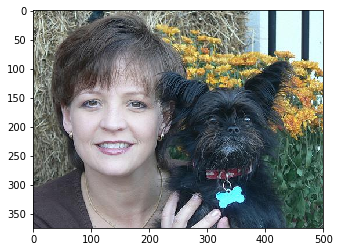

In [34]:
#Let's read the picture with cv2 library thanks to the picture's path :
img = cv2.imread(picture_path)
show_rgb_img(img)

In [35]:
#We convert the picture in grey in order to use the SIFT algorithm :
img_gray = to_gray(img)

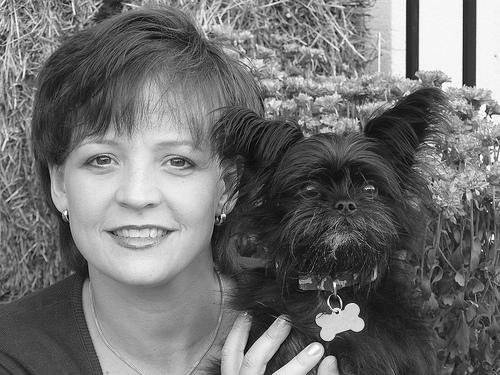

In [36]:
Image.fromarray(img_gray)

In [37]:
equalized_img = Image.fromarray(img_gray)
equalized_img = equalize(equalized_img)
equalized_img = np.array(equalized_img)

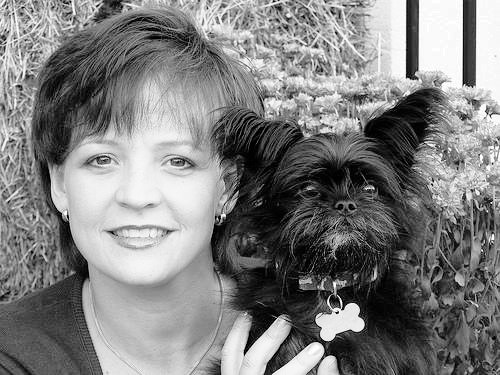

In [38]:
Image.fromarray(equalized_img)

<p>
        **<font color='#D2691E'size="4">III.2) Generating SIFT features</font>**
</p>

In [39]:
#We generate SIFT keypoints and descriptors : 
img_kp, img_desc = gen_sift_features(equalized_img)

Here are what our SIFT features look like for the first image:


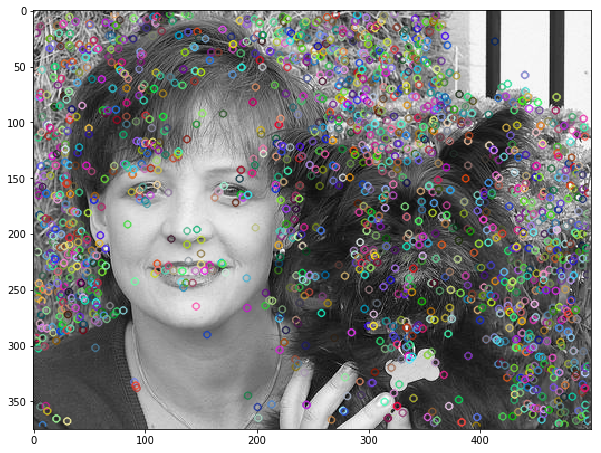

In [40]:
print('Here are what our SIFT features look like for the first image:')
show_sift_features(img_gray, img, img_kp)

<p>
        **<font color='#D2691E'size="4">III.3) Extracting SIFT features RGB values</font>**
</p>

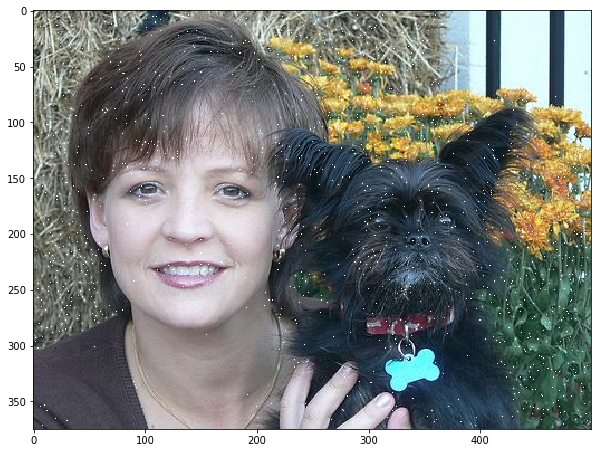

In [41]:
#How to extract the RGB data from a key feature ? 
colored_img = cv2.cvtColor(img, cv2.CV_32S)
img_test = colored_img.copy()
plt.figure(figsize=(10,10))
X_max = img.shape[0]
Y_max = img.shape[1]


for idx in range(len(img_kp)) :

    y_pixel = int(img_kp[idx].pt[0])
    if y_pixel >= Y_max:
        y_pixel = Y_max-1
        
    x_pixel = int(img_kp[idx].pt[1])
    if x_pixel >= X_max:
        x_pixel = X_max-1
    
    R_value = img_test[x_pixel, y_pixel][0]
    G_value = img_test[x_pixel, y_pixel][1]
    B_value = img_test[x_pixel, y_pixel][2]
    #if (B_value >= 150):
        #img_test[x_pixel, y_pixel] = 255
    img_test[x_pixel, y_pixel] = 255
    
    L_RGB = [R_value,G_value,B_value]
    RGB_mean = np.mean([L_RGB])
    
    R_10_percent_low = R_value-0.1*R_value
    R_10_percent_high = R_value+0.1*R_value
    
    G_10_percent_low = G_value-0.1*G_value
    G_10_percent_high = G_value+0.1*G_value
    
    B_10_percent_low = B_value-0.1*B_value
    B_10_percent_high = B_value+0.1*B_value
    
    
    neighbor_RGB_condition = ((RGB_mean>=R_10_percent_low) and (RGB_mean<=R_10_percent_high)) and\
    ((RGB_mean>=G_10_percent_low) and (RGB_mean<=G_10_percent_high)) and\
    ((RGB_mean>=B_10_percent_low) and (RGB_mean<=B_10_percent_high))
    
    if neighbor_RGB_condition:
        dominant_color = 'balance'
        
    elif (R_value>G_value) and (R_value>B_value):
        dominant_color = 'r'
    
    elif (G_value>R_value) and (G_value>B_value):
        dominant_color = 'g'
    
    elif (B_value>R_value) and (B_value>G_value):
        dominant_color = 'b'
        
    #print(dominant_color)
    
plt.imshow(img_test)

In [42]:
#We can make a function thanks to this process : 
def find_features_dom_color(myColoredPicture, picture_SIFT_keypoints):
    L_dominant_colors = []
    L_R_values = []
    L_G_values = []
    L_B_values = []
    
    for idx in range(len(picture_SIFT_keypoints)) :

        y_pixel = int(picture_SIFT_keypoints[idx].pt[0])
        if y_pixel >= Y_max:
            y_pixel = Y_max-1

        x_pixel = int(picture_SIFT_keypoints[idx].pt[1])
        if x_pixel >= X_max:
            x_pixel = X_max-1

        R_value = myColoredPicture[x_pixel, y_pixel][0]
        G_value = myColoredPicture[x_pixel, y_pixel][1]
        B_value = myColoredPicture[x_pixel, y_pixel][2]
        
        L_R_values.append(R_value)
        L_G_values.append(G_value)
        L_B_values.append(B_value)

        L_RGB = [R_value,G_value,B_value]
        RGB_mean = np.mean([L_RGB])

        R_10_percent_low = R_value-0.1*R_value
        R_10_percent_high = R_value+0.1*R_value

        G_10_percent_low = G_value-0.1*G_value
        G_10_percent_high = G_value+0.1*G_value

        B_10_percent_low = B_value-0.1*B_value
        B_10_percent_high = B_value+0.1*B_value


        balanced_RGB_condition = ((RGB_mean>=R_10_percent_low) and (RGB_mean<=R_10_percent_high)) and\
        ((RGB_mean>=G_10_percent_low) and (RGB_mean<=G_10_percent_high)) and\
        ((RGB_mean>=B_10_percent_low) and (RGB_mean<=B_10_percent_high))

        if balanced_RGB_condition:
            dominant_color = 'balanced'

        elif (R_value>G_value) and (R_value>B_value):
            dominant_color = 'red'

        elif (G_value>R_value) and (G_value>B_value):
            dominant_color = 'green'

        elif (B_value>R_value) and (B_value>G_value):
            dominant_color = 'blue'
        
        elif (R_value==G_value) and (R_value>B_value):
            dominant_color = 'rg'
        
        elif (R_value==B_value) and (R_value>G_value):
            dominant_color = 'rb'
        
        elif (G_value==B_value) and (G_value>R_value):
            dominant_color = 'gb'
        
        L_dominant_colors.append(dominant_color)
        
    dict_results = {'L_R_values':L_R_values,
                    'L_G_values':L_G_values,
                    'L_B_values':L_B_values,
                    'L_dominant_colors':L_dominant_colors}
    
    return(dict_results)

<p>
        **<font color='#D2691E'size="4">III.4) Building a relational data structure from SIFT features</font>**
</p>

In [43]:
#We can now build a DataFrame object with the SIFT descriptors of this picture :
tmp_image_features = pd.DataFrame(img_desc)
tmp_image_features['race'] = race
tmp_image_features['picture_name'] = picture
tmp_image_features['picture_id'] = ID

L_R_values = find_features_dom_color(colored_img, img_kp)['L_R_values']
tmp_image_features['R_value'] = L_R_values
L_G_values = find_features_dom_color(colored_img, img_kp)['L_G_values']
tmp_image_features['G_value'] = L_G_values
L_B_values = find_features_dom_color(colored_img, img_kp)['L_B_values']
tmp_image_features['B_value'] = L_B_values

L_dominant_colors = find_features_dom_color(colored_img, img_kp)['L_dominant_colors']
tmp_image_features['feature_dominant_color'] = L_dominant_colors


tmp_image_features['feature_id'] = range(0,len(L_dominant_colors))
tmp_image_features

,0,1,2,3,4,5,6,7,8,9,...,126,127,race,picture_name,picture_id,R_value,G_value,B_value,feature_dominant_color,feature_id
0,28.0,6.0,10.0,56.0,46.0,16.0,1.0,8.0,7.0,2.0,...,0.0,22.0,affenpinscher,affenpinscher_10225.jpg,0,224,232,221,balanced,0
1,3.0,2.0,1.0,2.0,4.0,17.0,22.0,13.0,2.0,2.0,...,14.0,6.0,affenpinscher,affenpinscher_10225.jpg,0,217,219,198,balanced,1
2,59.0,18.0,30.0,12.0,7.0,1.0,1.0,34.0,50.0,42.0,...,0.0,0.0,affenpinscher,affenpinscher_10225.jpg,0,217,219,198,balanced,2
3,25.0,4.0,0.0,24.0,57.0,10.0,0.0,2.0,76.0,4.0,...,18.0,48.0,affenpinscher,affenpinscher_10225.jpg,0,135,141,137,balanced,3
4,8.0,0.0,0.0,50.0,98.0,3.0,0.0,4.0,11.0,1.0,...,0.0,2.0,affenpinscher,affenpinscher_10225.jpg,0,24,29,25,green,4
5,98.0,1.0,0.0,2.0,41.0,19.0,7.0,73.0,67.0,3.0,...,2.0,1.0,affenpinscher,affenpinscher_10225.jpg,0,96,100,86,balanced,5
6,5.0,7.0,0.0,0.0,0.0,1.0,3.0,5.0,16.0,21.0,...,1.0,8.0,affenpinscher,affenpinscher_10225.jpg,0,96,100,86,balanced,6
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,36.0,17.0,affenpinscher,affenpinscher_10225.jpg,0,172,174,161,balanced,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,49.0,60.0,affenpinscher,affenpinscher_10225.jpg,0,84,85,77,balanced,8
9,19.0,17.0,98.0,47.0,2.0,4.0,6.0,32.0,85.0,33.0,...,0.0,0.0,affenpinscher,affenpinscher_10225.jpg,0,78,81,64,green,9


<p>
        **<font color='#D2691E'size="4">IV) Building the SIFT features for the train and test perimeters</font>**
</p>

In [44]:
#We can now generalize the above process to all the pictures :

In [45]:
#4 races => 587134 rows × 131 columns pour le train !
# 21 races => ~ 6 GO de RAM occupés 

In [46]:
#Because of the size of the resulting data, we are going to select only 10 random races out of the 120 initials :

N_RACES = 120
N_FILTERED_RACES = 10
L_races_indexes = list(range(0,N_RACES))
L_filtered_indexes = random.sample(L_races_indexes, N_FILTERED_RACES)
L_filtered_races = [L_races[i] for i in L_filtered_indexes]
L_filtered_races = list(np.sort(L_filtered_races))
L_filtered_races

['beagle',
 'bernese_mountain_dog',
 'dhole',
 'english_setter',
 'japanese_spaniel',
 'kelpie',
 'labrador_retriever',
 'rottweiler',
 'siberian_husky',
 'west_highland_white_terrier']

In [47]:
pickle.dump(N_FILTERED_RACES,open(pickles_path+"N_FILTERED_RACES_last_execution.p", "wb"))
pickle.dump(L_filtered_races,open(pickles_path+"L_%s_filtered_races.p"%(N_FILTERED_RACES), "wb"))

In [27]:
#We are going to build the final dataframes schema :
#We will first want to add some other informations : the picture's ID, the race and the picture's name
L_schema_columns = []

for col in ['picture_id','race','picture_name','feature_id','R_value','G_value','B_value','feature_dominant_color']:
    L_schema_columns.append(col)

#And we will have 128 SIFT features:
L_schema_columns+= list(range(128))
L_schema_columns

['picture_id',
 'race',
 'picture_name',
 'feature_id',
 'R_value',
 'G_value',
 'B_value',
 'feature_dominant_color',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [28]:
#Now we can build the final dataframe schema with pandas : 
df_final_DataFrame_schema = pd.DataFrame(columns = L_schema_columns)
df_final_DataFrame_schema

,picture_id,race,picture_name,feature_id,R_value,G_value,B_value,feature_dominant_color,0,1,...,118,119,120,121,122,123,124,125,126,127


In [48]:
start_time = time.time()

#We initialize an id for the first picture :
ID = 0
#We initialize a dictionary which will map each picture's id to its SIFT keypoints and descriptors:
dict_id_sift_params = {}

#And we can initialize the train and test dataframes :
df_train = df_final_DataFrame_schema.copy()
df_test = df_final_DataFrame_schema.copy()

#We loop over each race :
for race in L_filtered_races:
    print(race)
    
    #for each picture :
    for picture in dict_race_pictures[race]:
        #path to the picture : 
        picture_path = races_path+race+"\\"+picture
        #we read the picture with cv2 :
        img = cv2.imread(picture_path)
        #We read the picture in grey in order to use the SIFT algorithm :
        img_gray = to_gray(img)
        #We equalize the picture's histogram :
        equalized_img = Image.fromarray(img_gray)
        equalized_img = equalize(equalized_img)
        equalized_img = np.array(equalized_img)
        
        #We read the picture in RGB in order to extract the dominant colors of each SIFT feature :
        img_rgb = cv2.cvtColor(img, cv2.CV_32S)
        
        #We generate SIFT keypoints and descriptors : 
        img_kp, img_desc = gen_sift_features(equalized_img)
        #We map the SIFT keypoints to their ID :
        dict_id_sift_params[ID] = img_kp
        
        #We build a DataFrame object with the SIFT descriptors of this picture :
        tmp_image_features = pd.DataFrame(img_desc)
        tmp_image_features['race'] = race
        tmp_image_features['picture_name'] = picture
        tmp_image_features['picture_id'] = ID
        
        L_R_values = find_features_dom_color(img_rgb, img_kp)['L_R_values']
        tmp_image_features['R_value'] = L_R_values
        L_G_values = find_features_dom_color(img_rgb, img_kp)['L_G_values']
        tmp_image_features['G_value'] = L_G_values
        L_B_values = find_features_dom_color(img_rgb, img_kp)['L_B_values']
        tmp_image_features['B_value'] = L_B_values

        L_dominant_colors = find_features_dom_color(img_rgb, img_kp)['L_dominant_colors']
        tmp_image_features['feature_dominant_color'] = L_dominant_colors

        tmp_image_features['feature_id'] = range(0,len(L_dominant_colors))
        
        #If the picture is in the test perimeter...
        if picture in dict_race_pictures_test[race]:
            #...then we enrich the test DataFrame :
            df_test = df_test.append(tmp_image_features)
        else:
            df_train = df_train.append(tmp_image_features)
        
        #We finally increase the ID's value : 
        ID+=1
print("--- %s seconds ---" % (time.time() - start_time))

beagle
bernese_mountain_dog
dhole
english_setter
japanese_spaniel
kelpie
labrador_retriever
rottweiler
siberian_husky
west_highland_white_terrier
--- 2569.0563037395477 seconds ---


In [49]:
#Because "cv2.KeyPoint" objects can't be pickled, we extract and store them into a python "dict" object.

feature_id = 0
dict_pictures_features_caracs = {}

for picture_id in dict_id_sift_params.keys():
    dict_pictures_features_caracs[picture_id] = {}
    L_keypoint = dict_id_sift_params[picture_id]
    L_keypoint_id = list(range(0,len(L_keypoint)))
    
    for keypoint, keypoint_id in zip(L_keypoint,L_keypoint_id):        
            dict_pictures_features_caracs[picture_id][keypoint_id] = keypoint.pt
    
    feature_id+=1

In [50]:
dict_pictures_features_caracs[1]

{0: (2.4457950592041016, 343.1738586425781),
 1: (2.478668689727783, 62.29897689819336),
 2: (2.5092756748199463, 25.394668579101562),
 3: (2.513237476348877, 30.511363983154297),
 4: (2.542459726333618, 35.929141998291016),
 5: (2.7191803455352783, 369.6651916503906),
 6: (2.7191803455352783, 369.6651916503906),
 7: (2.9514718055725098, 345.5886535644531),
 8: (2.9514718055725098, 345.5886535644531),
 9: (3.2295286655426025, 245.72666931152344),
 10: (3.3244850635528564, 40.030540466308594),
 11: (3.3244850635528564, 40.030540466308594),
 12: (4.221031188964844, 371.978271484375),
 13: (4.572911739349365, 171.28968811035156),
 14: (4.702487945556641, 193.1844482421875),
 15: (5.203629970550537, 91.3291015625),
 16: (5.318061351776123, 196.03689575195312),
 17: (5.982571125030518, 210.7040557861328),
 18: (6.124422550201416, 339.1274108886719),
 19: (6.124422550201416, 339.1274108886719),
 20: (6.2853546142578125, 179.88504028320312),
 21: (6.3618693351745605, 61.4053955078125),
 22: (

In [51]:
df_train

,B_value,G_value,R_value,feature_dominant_color,feature_id,picture_id,picture_name,race,0,1,...,118,119,120,121,122,123,124,125,126,127
0,76,98,110,red,0,0,beagle_10108.jpg,beagle,2.0,0.0,...,21.0,8.0,42.0,41.0,61.0,98.0,10.0,1.0,0.0,1.0
1,20,23,27,red,1,0,beagle_10108.jpg,beagle,0.0,0.0,...,0.0,5.0,134.0,32.0,7.0,0.0,0.0,0.0,0.0,40.0
2,135,122,120,balanced,2,0,beagle_10108.jpg,beagle,11.0,2.0,...,0.0,30.0,38.0,3.0,8.0,1.0,0.0,0.0,1.0,106.0
3,82,107,117,red,3,0,beagle_10108.jpg,beagle,32.0,9.0,...,1.0,10.0,138.0,3.0,0.0,1.0,1.0,6.0,11.0,26.0
4,148,138,138,balanced,4,0,beagle_10108.jpg,beagle,34.0,7.0,...,0.0,0.0,0.0,0.0,91.0,125.0,0.0,0.0,0.0,0.0
5,84,107,122,red,5,0,beagle_10108.jpg,beagle,73.0,7.0,...,0.0,16.0,0.0,0.0,0.0,17.0,31.0,19.0,3.0,1.0
6,138,137,146,balanced,6,0,beagle_10108.jpg,beagle,10.0,0.0,...,1.0,4.0,86.0,40.0,5.0,10.0,19.0,0.0,0.0,0.0
7,56,77,92,red,7,0,beagle_10108.jpg,beagle,24.0,8.0,...,3.0,3.0,0.0,0.0,0.0,2.0,13.0,1.0,0.0,0.0
8,138,136,148,balanced,8,0,beagle_10108.jpg,beagle,31.0,0.0,...,0.0,2.0,95.0,6.0,0.0,0.0,20.0,24.0,3.0,10.0
9,138,136,148,balanced,9,0,beagle_10108.jpg,beagle,57.0,30.0,...,0.0,3.0,126.0,7.0,1.0,4.0,7.0,1.0,0.0,13.0


In [52]:
#We transform each feature dominant color into a column : 
start_time = time.time()
df_train.index = range(len(df_train))
df_train = values_to_col(df_train,['feature_dominant_color'],True)
print("--- %s seconds ---" % (time.time() - start_time))
df_train

--- 14.498242139816284 seconds ---


,B_value,G_value,R_value,feature_dominant_color,feature_id,picture_id,picture_name,race,0,1,...,127,feature_dominant_color_balanced,feature_dominant_color_blue,feature_dominant_color_gb,feature_dominant_color_green,feature_dominant_color_rb,feature_dominant_color_red,feature_dominant_color_rg,created_columns,dict_mapping
0,76,98,110,red,0,0,beagle_10108.jpg,beagle,2.0,0.0,...,1.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
1,20,23,27,red,1,0,beagle_10108.jpg,beagle,0.0,0.0,...,40.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
2,135,122,120,balanced,2,0,beagle_10108.jpg,beagle,11.0,2.0,...,106.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
3,82,107,117,red,3,0,beagle_10108.jpg,beagle,32.0,9.0,...,26.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
4,148,138,138,balanced,4,0,beagle_10108.jpg,beagle,34.0,7.0,...,0.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
5,84,107,122,red,5,0,beagle_10108.jpg,beagle,73.0,7.0,...,1.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
6,138,137,146,balanced,6,0,beagle_10108.jpg,beagle,10.0,0.0,...,0.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
7,56,77,92,red,7,0,beagle_10108.jpg,beagle,24.0,8.0,...,0.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
8,138,136,148,balanced,8,0,beagle_10108.jpg,beagle,31.0,0.0,...,10.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
9,138,136,148,balanced,9,0,beagle_10108.jpg,beagle,57.0,30.0,...,13.0,1,0,0,0,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...


In [53]:
df_test.index = range(len(df_test))
df_test = values_to_col(df_test,['feature_dominant_color'],True)

In [54]:
pickle.dump(df_train,open(pickles_path+"df_train_%s_races.p"%(N_FILTERED_RACES), "wb"))
pickle.dump(df_test,open(pickles_path+"df_test_%s_races.p"%(N_FILTERED_RACES), "wb"))
pickle.dump(dict_pictures_features_caracs,open(pickles_path+"dict_pictures_features_caracs_%s_races.p"%(N_FILTERED_RACES), "wb"))

In [55]:
df_test

,B_value,G_value,R_value,feature_dominant_color,feature_id,picture_id,picture_name,race,0,1,...,127,feature_dominant_color_balanced,feature_dominant_color_blue,feature_dominant_color_gb,feature_dominant_color_green,feature_dominant_color_rb,feature_dominant_color_red,feature_dominant_color_rg,created_columns,dict_mapping
0,134,223,237,red,0,1,beagle_10206.jpg,beagle,0.0,0.0,...,10.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
1,35,100,75,green,1,1,beagle_10206.jpg,beagle,60.0,2.0,...,0.0,0,0,0,1,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
2,3,44,36,green,2,1,beagle_10206.jpg,beagle,0.0,0.0,...,14.0,0,0,0,1,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
3,9,42,27,green,3,1,beagle_10206.jpg,beagle,0.0,0.0,...,35.0,0,0,0,1,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
4,2,48,29,green,4,1,beagle_10206.jpg,beagle,0.0,0.0,...,0.0,0,0,0,1,0,0,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
5,88,135,149,red,5,1,beagle_10206.jpg,beagle,34.0,7.0,...,2.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
6,88,135,149,red,6,1,beagle_10206.jpg,beagle,0.0,0.0,...,1.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
7,41,114,128,red,7,1,beagle_10206.jpg,beagle,3.0,3.0,...,29.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
8,41,114,128,red,8,1,beagle_10206.jpg,beagle,17.0,5.0,...,52.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
9,85,123,141,red,9,1,beagle_10206.jpg,beagle,105.0,12.0,...,1.0,0,0,0,0,0,1,0,"[feature_dominant_color_balanced, feature_domi...",{'feature_dominant_color': ['feature_dominant_...
